# Density Estimation

## Objectives
+ Definitions and Types of Density Estimation;
+ Parametric approaches: MLE and Moment based;
+ KDE python examples;
+ Modelling: Model Specification and Types of Models;
+ Model examples.

## Introduction:
In statistics, the probability density function (PDF) can be interpreted as providing a relative likelihood that the value of the random variable would equal the sample [1]. Assume a random variable $X$, and its PDF can be expressed as $f$, which represents the distribution of $X$, therefore, the probabilities between event $a$ and $b$ can be formulated as:

$$P(a<x<b)=\int_a^b{f(d)}\,{\rm d}x$$ 

**Density estimation** is to assume the density or PDF from the set of observed data. In other words, **Density Estimation** is the construction of an estimate of the density function from the observed data [2].

## Types of Density Estimation:
Generally speaking, the density estimation can be classified into three main categories:

***1) Parametric density estimation*** If we have the previous knowledge about the particular form for the density distribution of the observed data set (e.g. Gaussian, Unit, or Gamma), hence we need to estimate the parameters for each specific distribution which could be the best fit to obeserved data.
* **Method of Moments** chooses the parameters so that the sample moments (typically the sample mean and variance) match the theoretical moments of our chosen distribution [3].<br>
* **Maximum Likelihood** chooses the parameters to maximize the likelihood, which measures how likely it is to observe our given sample [3].<br>
* **Bayesian Estiation** minimizes the posterior expected value of a loss function, in other words, it maximizes the posterior expectation of a utility function [4].

***2) Non-Parametric density estimation*** Unlike the parametric density estimation, the non-parametric has no-assumption about the density and it will try to estimate the density from the observed data set (without any model). However, the computation for this non-parametric method grows with the data set size increasing.
* **Histogram** is a simple non-parametric density estimation method, but highly depends on the structure of the data, and suffers from artifacts, or higher-dimensions.<br>
* **Kernel Density Estimation (KDE)** estimate the PDF of a random variable. By using the kernal function, it accumulates or integrates the data, and smooth the density estimation. Buy the proper selection of bandwidth $h$ significantly affects the KDE's performance.<br>
* **Nearest Neghbour** <br> kNN (k-th nearest neighbor) using fixed points to determine the volume of region from the data.

***3) Semi-Parametric density estimation,*** which is a mixture mode of the previous metioned estimation.




## Parametric approaches

### *Method of Moments*
The method of moments is one of the oldest methods for point estimation. The basic idea is that the sample moments could give good estimates of the corresponding moments [5].
Suppose that the parameter set is denoted as: $\theta=(\theta_1,\theta_2,\cdots,\theta_k)$. So there can be $k$ population moments can be determined. For each population moments, or $m$-th, the method of moments can be written as:

$$\mu_k=E[X^k]$$

Now the corresponding sample moments, denoted as $m_k$ can be determined:

$$m_k=\frac{1}{n}\sum_{i=1}^{n} X_i^k$$

Note that the number of sample moments should be equal to the number of the parameters, for example:

$$m_1=\overline{X},  m_2=\frac{1}{n}\sum_{i=1}^{n}X_i^2$$

From the previous equations, the sample moments would have the same estimates as the corresponding population moments, which means:

$$\mu_k=m_k$$

Finally, the parameter list $\theta=(\theta_1,\theta_2,\cdots,\theta_k)$ can be solved according to the equation, and the solution is the moment estimator of $\hat{\theta}$.


### *Maximum Likelihood Estimation*
Suppose that we have the observed data set (or training data): $X=\{x_1,x_2,\cdots,x_n\}$, which is distributed according to a certain distribution with an unknown parameter $\theta$, which we need to estimate:

$$p_i(X_i=x_i|\theta)$$

$p_i(x_i|\theta)$ is not a conditional density, is a denote that highlight the density $p(x_i)$ is dependent on the parameters $\theta$.
Parameters $\theta$ is fixed but unknown. What we will do is finding the parameter value $\theta$ that maximizes the probability of obtaining the sample that has actually been observed.<br>

Again, note that the observed data set $X=\{x_1,x_2,\cdots,x_n\}$ is the $n$ independent samples from our data, (iid). Therefore, we can wirte the likelihood function of $\theta$ in terms of the observed set of samples $X$ as: 

$$ p(X|\theta)=\prod_{k=1}^n p(x_k|\theta)$$

So maximum likelihood estimation with respect to $\theta$ will maximize this likelihood function $p(X|\theta)$, which can be mathematical expressed as: 

$$\hat{\theta}=\mathop{\arg\max}_{\theta}[p(X|\theta)]$$

Usually, it might be a easier task to maximize $\log[p(X|\theta)]$ instead. Because the $\log$, $\lg$, or $\ln$ is monotonic function, hence we have:

$$\hat{\theta}=\mathop{\arg\max}_{\theta}[p(X|\theta)]=\mathop{\arg\max}_{\theta}[\log{p(X|\theta)}]$$

The maximum likelihood estimate of value of $\theta$ can be rewritten as:

$$\hat{\theta}=\mathop{\arg\max}_{\theta}[\log{\prod_{k=1}^n p(x_k|\theta)}]=\mathop{\arg\max}_{\theta}[{\sum_{k=1}^n \log{p(x_k|\theta)}}]$$

In this way, the maximization of a long product of terms is transferred into a easier way to maxmize the sum of probabilistic terms. It is a computational-saving strategy.
The maximizing the, $Y=\log{p(x_k|\theta)}$, term can be achieved by using gradient based algorithm. Assume that $\theta=(\theta_1,\theta_2,\cdots,\theta_m)^T$, and the gradient operator is:

$$\nabla_\theta{Y}=[\frac{\partial Y}{\partial\theta_1},\frac{\partial Y}{\partial\theta_2},\cdots,\frac{\partial Y}{\partial\theta_m}]^T$$

In order to find the optimum, we use the first-order condition which is:

$$\nabla_\theta{Y}=0$$

A set of optimum parameters of $\theta$ can be derived, in order to check that $\theta$ satisfies the condition is maximum, the second-order condition might be applied. Also check the upper and lower bound of the range of $\theta$.

## KDE and Python Example


### *Kernel Density Estimate*
KDE is a non-parametric way to estimate the PDF of an observed dataset. First, it is neccessary to introduce a pre-defined kernel function $K$,which satisfied the codition:

$$K=\int_{-\infty}^{+\infty}K(x)\,{\rm d}x=1$$

In the most cases $K$ will be a symmetric PDF, and normal density, for example, the Guassian Kernel. Therefore, the kernel density estimator $K$ can be written as:

$$\hat{f}=\frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-X_i}{h})$$

Note that the parameter $h$ is the window width, or bandwidth. The figure below shows the kernel estimate with individual kernels [copied from 6]. 

![3.JPG](3.JPG)

The shape of the kernel function $K$ outline is determined by the kernel function $K$, and the bandwidth is determined by $h$. More intuitive, the kernel estimator acts as a sum of each kernel window, as well as "bumps" in some case.

The effect of varying window width is shown in the figure below [copied from 6]. 

![2.JPG](2.JPG)

As we can see, a large vale of window width $h$ will over smooth the density estimate so that the structure of the dataset is hard to identify; a small value of $h$ gives a spiky density estimate which is too rough to explain.

So it is important to determine a appropriate value of window width $h$ for density estimation. In order to find a value of $h$, we compute and analyze the minimum squared error between the estimated density and the original density:

$$ E[(\hat{f}-f)^2]=E[\hat{f}-f]^2+var(\hat{f})$$

Therefore, the $h$ selection became an optimization problem:

$$h^*=\mathop{\arg\min}_{h}\{ E[\int(\hat{f}-f)^2\,{\rm d}x]\}$$

The first exceptation term is the bias, and the sencond term is the variance. This is the case of bias-variance tradeoff, where the bias could be reduced at the expense of the variance.

### *Finding optimal value of the bandwidth for KDE (Python)*

Load the library for KDE.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Generate and initialize the pseudo-random number as the observed dataset.

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

Parameter optimization. *GridSearchCV* provide an automatically interative hyper-parameter tuning. *GridSearchCV* method traverses multi-combination of hyper-parameters, and determine a set of hyper-parameter with the best performance by cross-validation. <br>

In this example, the esimator is a kernel density with guassian kernel; *cv* is the hyper-parameters for cross-validation, or it can also be the train/test generator; *LeaveOneOut* provides train/test indices to split data in train/test sets; *grid.fit()* is for running the grid search; *best_params_* describe the parameters which leads to the optimum.

In [3]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(x)))
grid.fit(x[:, None]);
grid.best_params_

{'bandwidth': 0.35111917342151316}

Plot the histogram of the observed dataset, and its KDE results.

(-0.02, 0.4)

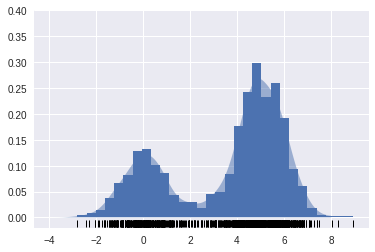

In [4]:
hist = plt.hist(x, bins=30, normed=True)
from sklearn.neighbors import KernelDensity
x_d = np.linspace(-4, 8, 1000)
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=0.35, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.4)

## Modelling: Model Specification and Types of Models
Model specification is to choose the specific type of model to apply to the data [6]. It can be classified into two types of models:<br>
* **Descriptive Models** presents the main feature of the data, and serves as a description characterization of data curve-fitting.<br>
* **Explanatory Models** is used to explain the phenomenon of the data and represents the complex functions with respect to the combinations of simplified components.<br>

The figure below shows the family of the model specification [copied from 7].<br> 

![1.JPG](1.JPG)

In machine learning, we applied a variety of models to data, and the model could learn to perform multi-tasks, such as prediction, classification. In terms of the purposes, models can be divided into (1) the models that can be used to perform supervised learning, and (2) that for unsupervised learning.<br>

Supervised learning aims mapping between the input variables and the output variables, while unsupervised learning is trying to find the features or characteristics on the given dataset.<br>

### Linear Models
Linear models can be expressed as the sum of the multiplications between weights and inputs. Suppose that the linear equation $y=ax+b$, so we can regards the parameters $a$ and $b$ as the weights and vecterized as: 

$$w=[w_1,w_2]=[a,b]$$

Also the inputs can be rewritten as: 

$$x=[x1,x2]=[x,1]$$

The model can be rewritten as:

$$y=w_1x_1+w_2x_2=wx^T=\sum_{i=1}^{n}{w_i}{x_i}$$

Linear models are readily available, and easy to fit.

### Non-linear Models
Nonlinear models are models in which the prediction cannot be simply expressed as a weighted sum. In general, the nonlinear models consists of three types: Linearized models, Parametric non-linear models, and Non-parametric nonlinear models.

#### Linearized Models
Linearized models are similar to the linear models, but the input space differs from that of linear model. Theinput space has been transformed by using nonliear functions, such as Gaussians, Polynomials, Logistics, or Sinusoids.

Suppose that a non-linear model $y=ax^2+bx+c$, where $a$, $b$, and $c$ are all parameters. Obviously, if $a\neq0$, the outputs or predictions are not linear with respect to $x$. However, if we present the weights and input set as:

$$ w=[w_1,w_2,w_3]=[a,b,c]$$

$$ x=[x_1,x_2,x_3]=[x^2,x,1]$$

then the model can be rewritten as:

$$y=w_1x_1+w_2x_2+w_3x_3=wx^T=\sum_{i=1}^{n}{w_i}{x_i}$$

In this case, the model can be viewed as a linear model with respect to the the new input space $[x^2,x,1]$.

The figure below shows the Linear and Linearized models [copied from 6].

![4.JPG](4.JPG)

#### Parametric Nonlinear Models
Parametric nonlinear cannot be rewritten or transfered into any form of linearized model, but it can be expressed by the certain format of mathematical operations. In other words, the parametric nonliner models can not be linear with respect to the free parameters in the models.
Consider the model $y=x^n$, where $n$ is a parameter, but the output of this model cannot be linear in terms of $n$, because the term $x^n$ has no way to be expressed as $ax^2+bx+c$, where $a$ $b$,and $c$ are weights.

#### Nonparametric Nonlinear Models
Nonparametric nonlinear models that can be generically applied to arbitrary datasets. In order to distinguish between parametric and nonparametric nonlinear model, there are some generalities concluded:<br>
* Nonparametric nonlinear models are nonlinear in terms of the free parameters, so these cannot be categorized as linearized models.
* Unlike nonparametric nonlinear models, parametric nonlinear models make more assumptions on the form of the nonlinearity of the model.<br>

Nonparametric nonlinear models are powerful, but the trained or fitted models can be less intuitive, and these models are suffering from overfitting and local minima. With the data size increased, the computational complexity of nonparametric nonlinear models will increase as well.
Examples: Nearest-Neighbor, Local Regression, and Neural Network.


The figure below shows the Parametric and Nonparametric Nonlinear Models [copied from 6].

![5.JPG](5.JPG)

## Model examples
This example illustrates the construction of a linear regression model for load cell data that relates a known load applied to a load cell to the deflection of the cell. The model is then used to calibrate future cell readings associated with loads of unknown magnitude [8].

The data collected in the calibration experiment consisted of a known load, applied to the load cell, and the corresponding deflection of the cell from its nominal position. Forty measurements were made over a range of loads from 150,000 to 3,000,000 units. The data were collected in two sets in order of increasing load. The systematic run order makes it difficult to determine whether or not there was any drift in the load cell or measuring equipment over time. Assuming there is no drift, however, the experiment should provide a good description of the relationship between the load applied to the cell and its response.

In [3]:
y = np.array([0.11019, 0.21956, 0.32949, 0.43899, 0.54803, 0.65694,
               0.76562, 0.87487, 0.98292, 1.09146, 1.20001, 1.30822,
               1.41599, 1.52399, 1.63194, 1.73947, 1.84646, 1.95392,
               2.06128, 2.16844, 0.11052, 0.22018, 0.32939, 0.43886,
               0.54798, 0.65739, 0.76596, 0.87474, 0.98300, 1.09150,
               1.20004, 1.30818, 1.41613, 1.52408, 1.63159, 1.73965,
               1.84696, 1.95445, 2.06177, 2.16829])
x = np.array([150000, 300000, 450000, 600000, 750000, 900000, 1050000,
         1200000, 1350000, 1500000, 1650000, 1800000, 1950000,
         2100000, 2250000, 2400000, 2550000, 2700000, 2850000,
         3000000, 150000, 300000, 450000, 600000, 750000, 900000,
         1050000, 1200000, 1350000, 1500000, 1650000, 1800000,
         1950000, 2100000, 2250000, 2400000, 2550000, 2700000,
         2850000, 3000000])

The first step in analyzing the data is to select a candidate model. In the case of a measurement system like this one, a fairly simple function should describe the relationship between the load and the response of the load cell. One of the hallmarks of an effective measurement system is a straightforward link between the instrumental response and the property being quantified.

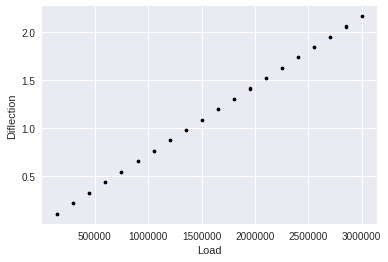

In [4]:
plt.plot(x, y, "k.")
plt.xlabel("Load")
plt.ylabel("Diflection");

Using software for computing least squares parameter estimates, the straight-line model:

$$ D=\beta_0+\beta_1L+\epsilon$$

is easily fit to the data.

Least squares estimate values: [  7.22102581e-07   6.14968421e-03]


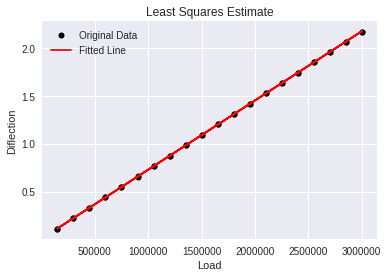

In [8]:
X=np.vstack([x,np.ones(len(x))]).T
a=np.linalg.lstsq(A,y)[0]

print('Least squares estimate values:', a)

plt.plot(x, y, "k.",label='Original Data',markersize=12)
plt.plot(x,np.dot(X,a),'r',label='Fitted Line')
plt.xlabel("Load")
plt.ylabel("Diflection");
plt.legend()
plt.title('Least Squares Estimate for Linear Regression')
plt.show()

After fitting a straight line to the data, many people like to check the quality of the fit with a plot of the data overlaid with the estimated regression function. Graphical analysis of the residuals is the single most important technique for determining the need for model refinement or for verifying that the underlying assumptions of the analysis are met.

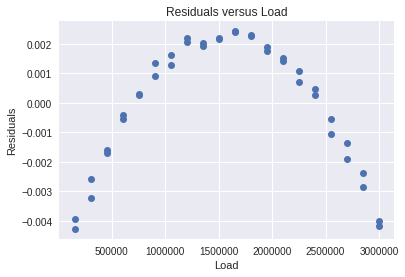

In [17]:
residuals=y-np.dot(X,a)
plt.plot(x, residuals, "o")
plt.xlabel("Load")
plt.ylabel("Residuals");
plt.title('Residuals versus Load')


Reviewing the plots of the residuals versus all potential predictor variables can offer insight into selection of a new model, just as a plot of the data can aid in selection of an initial model. Iterating through a series of models selected in this way will often lead to a function that describes the data well.<br>
The horseshoe-shaped structure in the plot of the residuals versus load suggests that a quadratic polynomial might fit the data well. 

Based on the residual plots, the function used to describe the data should be the quadratic polynomial:

$$ D=\beta_0+\beta_1L+\beta_2L^2+\epsilon$$

The data with a quadratic estimated regression function and the residual plots are shown below.

Least squares estimate values: -3.16081908282e-15 7.32059161768e-07 0.000673564732418


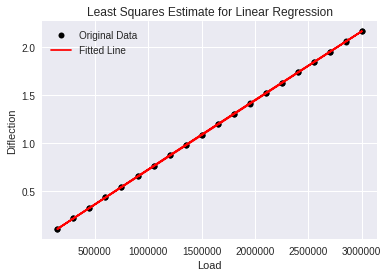

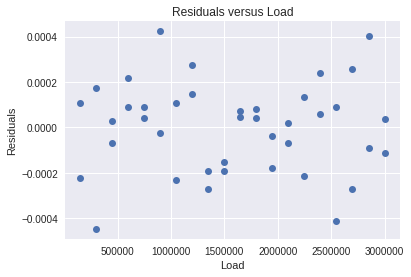

In [22]:
from scipy.optimize import leastsq

def func(params, L):
    a,b,c=params
    return a*L*L+b*L+c

def error(params,L,S):
    return func(params,L)-S

def slovePara():
    p0=[1,1,1]
    Para=leastsq(error,p0,args=(x,y))
    return Para

def solution():
    Para=slovePara()
    a,b,c=Para[0]
    print('Least squares estimate values:',a,b,c)
    plt.plot(x, y, "k.",label='Original Data',markersize=12)
    plt.plot(x,func(Para[0],x),'r',label='Fitted Line')
    plt.xlabel("Load")
    plt.ylabel("Diflection");
    plt.legend()
    plt.title('Least Squares Estimate for Linear Regression')
    plt.show()
    
    residuals=y-func(Para[0],x)
    plt.plot(x, residuals, "o")
    plt.xlabel("Load")
    plt.ylabel("Residuals");
    plt.title('Residuals versus Load')

solution()

The residuals randomly scattered around zero, indicate that the quadratic is a good function to describe these data. There is also no indication of non-constant variability over the range of loads.

## References
[1] https://en.wikipedia.org/wiki/Probability_density_function<br>
[2] https://ned.ipac.caltech.edu/level5/March02/Silverman/Silver1.html<br>
[3] https://github.com/fonnesbeck/scipy2015_tutorial/blob/master/notebooks/2.%20Density%20Estimation.ipynb<br>
[4] https://en.wikipedia.org/wiki/Bayes_estimator<br>
[5] http://gradquant.ucr.edu/wp-content/uploads/2013/11/Maximum-Likelihood-and-Method-of-Moments-Estimation.pdf<br>
[6] http://research.cs.tamu.edu/prism/lectures/pr/pr_l7.pdf<br>
[7] http://www.cmrr.umn.edu/~kendrick/statsmatlab/StatsLecture3Slides_ModelSpecification.pdf<br>
[8] http://www.itl.nist.gov/div898/handbook/pmd/section6/pmd61.htm <br>